# import all the libraries we will need

In [129]:
#import libraries
import nltk
import codecs
import pandas as pd
import numpy as np
import glob
import re
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import csv
sns.set_style('whitegrid')
%matplotlib inline

# go through the list of files and create a dataframe with all of the files with a column for topic and for date

In [85]:
!ls data

blm_6_26_20.csv     blm_7_31_20.csv     climate_7_24_20.csv covid_7_17_20.csv
blm_7_03_20.csv     climate_6_26_20.csv climate_7_31_20.csv covid_7_24_20.csv
blm_7_10_20.csv     climate_7_03_20.csv covid_6_26_20.csv   covid_7_31_20.csv
blm_7_17_20.csv     climate_7_10_20.csv covid_7_03_20.csv
blm_7_24_20.csv     climate_7_17_20.csv covid_7_10_20.csv


In [86]:
path = r'data' # I have all of your files in a folder called 'data' in the same folder as this code


blm_files = glob.glob(path + "/blm*.csv")
climate_files = glob.glob(path + "/climate*.csv")
covid_files = glob.glob(path + "/covid*.csv")

items = str.split('_')

def makedf(all_files_list):
    li = []
    for filename in all_files_list:
        df = pd.read_csv(filename)
        li.append(df)
        return li
climate_list = makedf(climate_files)
climateframe = pd.concat(climate_list, axis=0, ignore_index=True)
climateframe['topic'] = 'climate'

blm_list = makedf(blm_files)
blmframe = pd.concat(blm_list, axis=0, ignore_index=True)
blmframe['topic'] = 'blm'

covid_list = makedf(covid_files)
covidframe = pd.concat(covid_list, axis=0, ignore_index=True)
covidframe['topic'] = 'covid'

frame = pd.concat([climateframe, blmframe, covidframe])

/Users/nicholebennett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [87]:
frame.head()

,account_created_at,account_lang,bbox_coords,character,coords_coords,country,country_code,created_at,description,display_text_width,...,symbols,text,topic,url,urls_expanded_url,urls_t.co,urls_url,user_id,verified,word_count
0,7/27/15 23:54,NaN,NA NA NA NA NA NA NA NA,238.0,NA NA,NaN,NaN,7/17/20 19:13,The Total Absence of Responsibility. Husky Dad...,NaN,...,NaN,"This week, in case you missed it, we’re diving...",climate,NaN,NaN,NaN,NaN,x3391178495,False,39.0
1,6/11/11 22:16,NaN,NA NA NA NA NA NA NA NA,241.0,NA NA,NaN,NaN,7/17/20 19:13,Proud lifelong #liberal #feminist #humanist #L...,NaN,...,NaN,"“Already, U.S. cities are experiencing more he...",climate,NaN,https://twitter.com/i/web/status/1284204504355...,https://t.co/5vzld1oSza,twitter.com/i/web/status/1…,x315455150,False,36.0
2,10/15/14 0:12,NaN,NA NA NA NA NA NA NA NA,175.0,NA NA,NaN,NaN,7/17/20 19:13,I ALWAYS LIKE TALL GIRLS THEY HAVE TO BE BARE ...,NaN,...,NaN,"G20: Rich, powerful states must ensure COVID-1...",climate,NaN,NaN,NaN,NaN,x2856133189,False,22.0
3,11/24/15 11:47,NaN,NA NA NA NA NA NA NA NA,278.0,NA NA,NaN,NaN,7/17/20 19:13,Retired court official promoted to liberal eli...,NaN,...,NaN,“We cannot go back to normal. Normality alread...,climate,NaN,NaN,NaN,NaN,x4264297743,False,39.0
4,10/13/10 4:12,NaN,NA NA NA NA NA NA NA NA,305.0,NA NA,NaN,NaN,7/17/20 19:13,Sports fan. Progressive. #IDWP #SocialJustice ...,NaN,...,NaN,The greatest disaster-film franchise of all ti...,climate,NaN,NaN,NaN,NaN,x202028457,False,38.0


In [88]:
frame.to_csv("worry_tweets.csv")

In [89]:
# here is where the tweets are--I'm creating a variable to store them
tweets = frame.text

# Preprocess the tweets

In [90]:
# lowercase everything
processed_tweets = tweets.str.lower()

In [91]:
processed_tweets.head()

0    this week, in case you missed it, we’re diving...
1    “already, u.s. cities are experiencing more he...
2    g20: rich, powerful states must ensure covid-1...
3    “we cannot go back to normal. normality alread...
4    the greatest disaster-film franchise of all ti...
Name: text, dtype: object

In [92]:
# remove all newlines
processed_tweets = processed_tweets.str.strip()

In [93]:
processed_tweets

0       this week, in case you missed it, we’re diving...
1       “already, u.s. cities are experiencing more he...
2       g20: rich, powerful states must ensure covid-1...
3       “we cannot go back to normal. normality alread...
4       the greatest disaster-film franchise of all ti...
                              ...                        
1873                          👀👀👀 https://t.co/baojsq7lnx
1874    covid-19 is raging across america. we have fai...
1875    thanks so much for chatting about the covid-19...
1876    covid-19 : un vaccin français testé sur l'homm...
1877    hey #antimaskers: can you please stop devastat...
Name: text, Length: 2177, dtype: object

# remove all punctuation, emojis, hashtags, and @
NOTE: this might be something we don't want if you want to pull out interactions or hashtags

In [94]:
processed_tweets = processed_tweets.str.replace('[^A-z ]','')

In [95]:
processed_tweets

0       this week in case you missed it were diving in...
1       already us cities are experiencing more heat w...
2       g rich powerful states must ensure covid recov...
3       we cannot go back to normal normality already ...
4       the greatest disasterfilm franchise of all tim...
                              ...                        
1873                                    httpstcobaojsqlnx
1874    covid is raging across america we have failed ...
1875    thanks so much for chatting about the covid si...
1876    covid un vaccin franais test sur lhomme  parti...
1877    hey antimaskers can you please stop devastatin...
Name: text, Length: 2177, dtype: object

# tokenize the tweets (split into word unites)

In [96]:
words = [ nltk.word_tokenize( str(processed_tweets) ) for processed_tweets in processed_tweets ]

In [97]:
words

[['this',
  'week',
  'in',
  'case',
  'you',
  'missed',
  'it',
  'were',
  'diving',
  'into',
  'rollbacks',
  'rollbacks',
  'getting',
  'rolled',
  'back',
  'for',
  'real',
  'new',
  'policies',
  'to',
  'address',
  'climate',
  'change',
  'and',
  'new',
  'apps',
  'to',
  'help',
  'to',
  'make',
  'that',
  'happen',
  'all',
  'of',
  'that',
  'and',
  'more',
  'here',
  'httpstcohpbfawk'],
 ['already',
  'us',
  'cities',
  'are',
  'experiencing',
  'more',
  'heat',
  'waves',
  'than',
  'occurred',
  'over',
  'half',
  'a',
  'century',
  'ago',
  'in',
  'the',
  's',
  'climate',
  'change',
  'doesnt',
  'make',
  'extreme',
  'events',
  'like',
  'storms',
  'drought',
  'and',
  'heat',
  'waves',
  'it',
  'makes',
  'them',
  'worse',
  'httpstcoxpdvsnt'],
 ['g',
  'rich',
  'powerful',
  'states',
  'must',
  'ensure',
  'covid',
  'recovery',
  'measures',
  'tackle',
  'global',
  'poverty',
  'inequality',
  'and',
  'the',
  'climate',
  'crisis

In [99]:
# add these to the original dataframe
frame['tweet_words'] = words
frame.head()

,account_created_at,account_lang,bbox_coords,character,coords_coords,country,country_code,created_at,description,display_text_width,...,text,topic,url,urls_expanded_url,urls_t.co,urls_url,user_id,verified,word_count,tweet_words
0,7/27/15 23:54,NaN,NA NA NA NA NA NA NA NA,238.0,NA NA,NaN,NaN,7/17/20 19:13,The Total Absence of Responsibility. Husky Dad...,NaN,...,"This week, in case you missed it, we’re diving...",climate,NaN,NaN,NaN,NaN,x3391178495,False,39.0,"[this, week, in, case, you, missed, it, were, ..."
1,6/11/11 22:16,NaN,NA NA NA NA NA NA NA NA,241.0,NA NA,NaN,NaN,7/17/20 19:13,Proud lifelong #liberal #feminist #humanist #L...,NaN,...,"“Already, U.S. cities are experiencing more he...",climate,NaN,https://twitter.com/i/web/status/1284204504355...,https://t.co/5vzld1oSza,twitter.com/i/web/status/1…,x315455150,False,36.0,"[already, us, cities, are, experiencing, more,..."
2,10/15/14 0:12,NaN,NA NA NA NA NA NA NA NA,175.0,NA NA,NaN,NaN,7/17/20 19:13,I ALWAYS LIKE TALL GIRLS THEY HAVE TO BE BARE ...,NaN,...,"G20: Rich, powerful states must ensure COVID-1...",climate,NaN,NaN,NaN,NaN,x2856133189,False,22.0,"[g, rich, powerful, states, must, ensure, covi..."
3,11/24/15 11:47,NaN,NA NA NA NA NA NA NA NA,278.0,NA NA,NaN,NaN,7/17/20 19:13,Retired court official promoted to liberal eli...,NaN,...,“We cannot go back to normal. Normality alread...,climate,NaN,NaN,NaN,NaN,x4264297743,False,39.0,"[we, can, not, go, back, to, normal, normality..."
4,10/13/10 4:12,NaN,NA NA NA NA NA NA NA NA,305.0,NA NA,NaN,NaN,7/17/20 19:13,Sports fan. Progressive. #IDWP #SocialJustice ...,NaN,...,The greatest disaster-film franchise of all ti...,climate,NaN,NaN,NaN,NaN,x202028457,False,38.0,"[the, greatest, disasterfilm, franchise, of, a..."


# remove stopwords (common words like "the")

In [100]:
stop = stopwords.words('english')
words = frame['tweet_words'].apply(lambda x: [item for item in x if item not in stop])

In [101]:
frame['tweet_words'] = words
frame.head()

,account_created_at,account_lang,bbox_coords,character,coords_coords,country,country_code,created_at,description,display_text_width,...,text,topic,url,urls_expanded_url,urls_t.co,urls_url,user_id,verified,word_count,tweet_words
0,7/27/15 23:54,NaN,NA NA NA NA NA NA NA NA,238.0,NA NA,NaN,NaN,7/17/20 19:13,The Total Absence of Responsibility. Husky Dad...,NaN,...,"This week, in case you missed it, we’re diving...",climate,NaN,NaN,NaN,NaN,x3391178495,False,39.0,"[week, case, missed, diving, rollbacks, rollba..."
1,6/11/11 22:16,NaN,NA NA NA NA NA NA NA NA,241.0,NA NA,NaN,NaN,7/17/20 19:13,Proud lifelong #liberal #feminist #humanist #L...,NaN,...,"“Already, U.S. cities are experiencing more he...",climate,NaN,https://twitter.com/i/web/status/1284204504355...,https://t.co/5vzld1oSza,twitter.com/i/web/status/1…,x315455150,False,36.0,"[already, us, cities, experiencing, heat, wave..."
2,10/15/14 0:12,NaN,NA NA NA NA NA NA NA NA,175.0,NA NA,NaN,NaN,7/17/20 19:13,I ALWAYS LIKE TALL GIRLS THEY HAVE TO BE BARE ...,NaN,...,"G20: Rich, powerful states must ensure COVID-1...",climate,NaN,NaN,NaN,NaN,x2856133189,False,22.0,"[g, rich, powerful, states, must, ensure, covi..."
3,11/24/15 11:47,NaN,NA NA NA NA NA NA NA NA,278.0,NA NA,NaN,NaN,7/17/20 19:13,Retired court official promoted to liberal eli...,NaN,...,“We cannot go back to normal. Normality alread...,climate,NaN,NaN,NaN,NaN,x4264297743,False,39.0,"[go, back, normal, normality, already, crisis,..."
4,10/13/10 4:12,NaN,NA NA NA NA NA NA NA NA,305.0,NA NA,NaN,NaN,7/17/20 19:13,Sports fan. Progressive. #IDWP #SocialJustice ...,NaN,...,The greatest disaster-film franchise of all ti...,climate,NaN,NaN,NaN,NaN,x202028457,False,38.0,"[greatest, disasterfilm, franchise, time, clim..."


# stem and lemmatize

In [111]:
# convert to list for all topics and by each topic
all = frame.tweet_words.values.tolist()
climate = frame[frame.topic == "climate"].tweet_words.values.tolist()
blm = frame[frame.topic == "blm"].tweet_words.values.tolist()
covid = frame[frame.topic == "covid"].tweet_words.values.tolist()

In [103]:
stemmer = nltk.SnowballStemmer('english')

In [116]:
def stemlist(tweets):
    li = []
    for tlist in tweets:
        for t in tlist:
            li.append(stemmer.stem(t))
    return li
        
all = stemlist(all)
climate = stemlist(climate)
blm = stemlist(blm)
covid = stemlist(covid)

# word frequencies

In [119]:
all_fdist = nltk.FreqDist(all)
climate_fdist = nltk.FreqDist(climate)
blm_fdist = nltk.FreqDist(blm)
covid_fdist = nltk.FreqDist(covid)

In [121]:
for key, value in all_fdist.items():
    print(key, value)

week 64
case 253
miss 5
dive 2
rollback 2
get 114
roll 8
back 62
real 22
new 190
polici 13
address 11
climat 48
chang 38
app 5
help 39
make 49
happen 35
httpstcohpbfawk 1
alreadi 27
us 170
citi 31
experienc 5
heat 14
wave 9
occur 1
half 4
centuri 1
ago 39
doesnt 23
extrem 2
event 11
like 63
storm 1
drought 1
wors 5
httpstcoxpdvsnt 1
g 6
rich 5
power 15
state 100
must 42
ensur 6
covid 880
recoveri 7
measur 13
tackl 3
global 21
poverti 3
inequ 13
crisi 43
via 38
amnesti 1
intern 4
httpstcoffpexini 1
go 112
normal 24
destruct 12
natur 15
notic 11
privileg 12
soop 11
ed 13
mitzijonell 11
nakabuyehildaf 11
licypriyak 11
nickibeckerok 11
morehttpstcoarddyihyt 11
greatest 5
disasterfilm 1
franchis 1
time 72
climatecrisi 4
hot 4
releas 5
star 3
carbon 6
dioxid 3
cowritten 1
sciencescreenplay 1
ipcc_chdirect 1
greenhous 1
effectproduc 1
burn 1
fossil 1
fuelsstudio 1
nasa 2
httpstcoplkaoruenf 1
soft_cantaloup 1
tbh 1
straight 1
tiktok 1
show 27
sixpack 1
girlfriend 1
fetish 2
wlw 1
thirst 1
inst

recognitionhttpstcoismdiuz 1
jonporti 1
vergeaieth 1
ai 5
machinelearn 1
blacklivesmattercc 1
akwyz 1
topcybernew 1
digitalcloudg 1
jblefevr 1
jbarbosapr 1
roxanasoi 1
miad 1
jolaburnett 1
stealthswrld 1
_realkc 1
liberalsil 1
rekxzfn 1
lildiesel 1
pokimanelol 1
name 4
rioter 3
belief 2
tire 4
found 8
separ 1
behind 9
condemn 1
inform 12
alltulsa 1
councilor 1
httpstcojeckvfollow 1
rparkersci 1
rudi 1
giuliani 1
rid 2
marxist 3
groupvotetrumpvot 1
laura 2
lmer 2
congresshttpstcondugon 2
httpstcoyctjmxso 1
sure 15
understood 1
there 8
necessari 14
shed 1
light 2
issu 13
overlook 2
flag 1
fcc 1
reinstat 20
longstand 1
license 1
provid 11
content 1
corpor 4
namelogo 1
phrase 3
hate 5
paypig 1
mean 16
payday 1
repar 1
findom 1
cashapp 1
kashluvsm 1
bnwo 1
afrodommemag 1
blackfinqueen 1
ebonydompromo 1
promoebonydomm 1
httpstcokwfuvmw 1
thought 7
provok 1
podcast 2
worth 2
listenblacklivesmatt 1
httpstcodzzpiou 1
anyon 12
wonder 6
httpstcoaduemcyeng 1
wweek 1
sinc 23
onewa 1
probabl 6
plan 

south 8
westhttpstcoksqutqjn 1
historian 3
puzzl 3
avoid 16
hurt 5
lib 3
argentina 15
bueno 10
vuelv 2
estricta 5
covidcada 1
semana 7
tendremo 1
ms 50
reporta 1
horacio 4
rodrguez 5
jefe 4
ciudaden 1
vivo 5
httpstcokknyqr 1
httpstcokkeownsam 1
abctvpi 1
httpstcoxrlvtnigi 1
precaut 7
sped 4
couldv 4
comingeveryon 4
liter 10
saw 7
httpstcogffaodaexu 4
onethird 3
itali 4
peak 3
httpstcoirzzckqljm 1
tn 5
amount 4
downward 2
anywher 7
sight 2
httpstcogdherorgchart 2
spleck 2
httpstcobfkqwwdi 2
success 8
virtual 3
pulmonari 1
rehab 1
exercis 2
capac 10
copd 1
status 1
qol 1
score 1
prefer 2
httpstcotojmeuor 1
msmes 1
physic 3
locat 6
temporarili 6
ceas 1
cash 2
flow 1
conting 1
lisa 1
acpmsmeday 1
msmeday 1
cariforum 1
segura 1
cultura 1
complint 1
distnci 1
foto 4
bcn 1
fest 1
primer 6
dia 3
obren 1
cinem 1
millor 1
illustrar 1
una 32
notcia 1
rebrot 3
estigmatitzar 1
tocat 1
indigen 10
melinda 9
gatesso 1
narnia 1
cruel 3
unbeliev 6
depopul 1
aslan 1
satan 3
affair 1
mennovaccineform 1
lm

pack 1
suitcas 1
toy 1
shovel 1
sand 1
mold 1
appar 2
somewher 1
chico 3
postcard 1
trumpgenocid 2
spreadjoebiden 1
wine 1
moreliesmoredi 1
votebiden 1
httpstcoksngii 1
societ 3
responsibilityif 3
outbreakw 3
realiz 4
processw 3
lina 1
hidalgo 2
httpstcolbyaoxj 1
eaterhoustonattn 1
rosi 7
perform 8
rapid 9
reliabl 7
vietnam 1
flight 3
japan 1
httpstcoxbarqyddd 1
cnntravel 1
zangrilloil 1
contagioso 1
capacit 1
fare 2
pi 2
il 18
prof 2
ranieri 1
guerra 4
piuttosto 1
grisanti 1
disegnano 1
deg 1
scenari 1
apocalittici 1
corretto 1
perch 3
vien 1
spaventatacoronavirus 1
tgpost 1
httpstcojgoibtd 1
id 1
southwestair 1
ride 2
plane 3
spotless 1
httpstconvzzgewi 1
occupi 1
contract 5
privat 6
holder 1
net 1
ira_kenya 1
sage 3
given 4
mix 1
pupil 1
class 3
httpstcocuzguzgqm 1
aw 15
nah 3
april 5
combin 3
horrifi 1
ceoecolab 1
baker 1
bethfordlol 1
import 4
agil 2
resili 1
navig 1
host 1
edward 2
deme 1
columbia_biz 1
hospitalis 3
region 4
except 7
tini 1
east 1
west 1
backp 1
northern 1
irelan

qanon 1
map 1
dot 2
pub 1
qarmi 1
wwggwa 1
httpstcojqalmnhia 1
calgari 1
condo 1
ctv 1
httpstcobxtwygyzi 1
nigeria 1
identifi 3
infectiontakerespons 1
httpstcogtjqlmbm 1
totalflorida 1
revancha 1
depredador 1
sperbacteria 1
httpstcofpujviw 1
httpstcopaejrxgc 1
httpstcokcchnxm 1
sig 1
disabl 2
lgbti 1
visibl 1
httpstcobzupkfagl 1
houdart 1
leebadgett 1
anjalifleuri 1
mrifound 1
ofb_lgbt 1
outrightintl 1
iced_lshtm 1
unmigr 1
suprem 6
court 6
rip 5
afford 4
protectourcar 4
httpstcoiboglimdv 4
unawar 2
unpaid 1
carer 1
tomorrow 4
zoom 2
chat 2
almasaarfalkirk 1
dm 2
boomer 2
relat 5
professor 1
mcintyr 1
consult 1
orthodontist 1
clinic 4
director 4
dunde 1
dental 1
applaud 1
ninewel 1
discharg 2
intens 2
daysread 1
httpstcofafgmmjjhttpstcogmmlvbcsgv 1
facemask 3
httpstcoxtktocjt 1
perdist 1
segunda 2
manejo 2
derram 2
pleural 2
covidcuidamosdeti 1
webinargratuitowebinar 1
podr 1
httpstcogeqcbnb 1
trav 3
youtub 3
withwhitehous 3
becam 3
httpstcobzhkczlex 1
microsoft 1
founder 1
bleak 1
hed

anthoni 2
infecti 1
httpstcobzqfabt 1
onualllivesmatt 4
onuabortono 5
ecuadoronuonumujeresantonioguterresmfespinosaec 2
fbiwfo 2
stfu 1
trumpcovidfailur 1
bidenlandslid 1
gopbetrayedamerica 1
trumpcult 1
trumpkillsus 1
osha_dol 1
secgenescalia 1
httpstcoktbahkcym 1
saturday 1
glblctzn 2
eu_commiss 2
globalgoalunit 2
artist 1
comedian 1
tunein 1
httpstcoftggspwm 1
httpstcowchvwu 1
knownour 1
repugn 1
pure 2
evil 2
httpstcoipkcxxoj 1
contigoentregamo 1
alimentario 2
casasprotgeteyprotegealosdem 1
lacdmxteapoya 1
httpstcofuhvlsvl 1
coronahttpstcoaxsgqgivacoronaupd 1
httpstcorwevpgjp 2
tribut 1
gratitud 1
httpstconvkclnxg 1
correl 1
airway 1
epitheliumimmun 1
cell 2
singlecel 1
biotechnolog 1
httpstcopctsfvkuy 1
snohomish 1
appli 4
transit 2
criteria 1
fridayhttpstcovorbwndac 1
uscanada 2
inspect 1
boat 1
snowbird 1
weigh 1
httpstcoheyemlhim 1
espero 2
minsal 1
preparado 2
avalancha 1
abstenido 1
acercars 1
milieu 1
laviat 1
pril 1
estc 1
devrait 2
rouvrir 1
frontir 1
dautr 1
selon 1
olivi

httpstcomwjwhqtju 2
channel 2
eyewit 1
gwarmothwftv 1
httpstcoxgkxwxbwx 1
attn 2
pencehttpstcoqdhlpgsbg 1
httpstcondmnacvg 1
tsunami 1
reportan 1
realizamo 1
verificacin 1
direccion 1
efectivament 1
corresponden 1
cali 1
tuvimo 2
incrementa 1
ocupacin 1
vengo 1
httpstcoakqkcwzf 1
wisconsin 3
hall 1
useless 1
exagger 1
consortium 1
conductor 1
profession 1
choir 1
httpstcofcnzdttp 1
choralsing 1
lifeafterlockdown 1
httpstcohrnqlmyfvi 1
jsui 1
dsol 1
dsole 1
voir 2
genr 1
quun 1
homm 1
moi 1
gueul 1
veut 1
crier 1
revend 1
corect 1
oui 2
ingalit 1
difficult 2
cook 7
forget 1
httpstcokwkjlacw 1
coop 1
bay 1
rampr 1
ordin 1
pray 1
squir 1
equilibra 1
desvanecimiento 1
limpio 1
elcoronavirus 1
httpstcohxdehypuy 1
httpstcongifhmmvvk 1
httpstconbodzqh 2
diagnos 2
conjunct 1
httpstcoeqagezii 1
astonish 1
illumin 1
journal 1
incred 2
agohttpstcogozyinpz 1
slowli 4
delet 4
leadup 4
hump 4
httpstcomutzshwgm 4
trappolahttpstcopeani 1
trppolon 1
seminato 1
seminano 1
paura 1
beoti 1
bevonos 1
svegl

bemislead 1
httpstcochojiwmrrz 1
httpstcocqagtkvhop 1
viceprefecta 1
chimborazo 1
delia 1
caguano 1
lideresa 1
fraguada 1
comunidad 2
tumba 1
donaldjtrumpjr 1
rafal 2
credit 1
amitabh 1
bhachan 1
actor 1
pursual 1
minimum 1
rscrs 1
soft 1
horac 1
yonker 1
httpstcolhqudxiseu 1
albert 1
einstein 1
probe 1
tratar 1
httpstcoepxhuvbz 1
esmaelmorai 1
httpstcoufpmpccfwh 1
altro 1
magia 1
musica 1
michele_bravi 1
unisc 1
progetto 1
disney_it 1
sostener 1
limpegno 1
dei 1
tantissimi 1
volontari 1
crocerossa 1
nellemergenza 1
immergiamoci 1
insiem 1
nellatmosfera 1
coco 1
brano 1
ricordami 1
httpstcofmvbhopsm 1
comportando 1
spagnola 1
autunno 1
milioni 1
morti 1
httpstcodmtlewqni 1
desrespeito 1
tamanho 1
vejo 1
tentando 1
interferir 1
alheia 1
pq 1
ess 1
descaso 1
elescriancasyanomami 1
reuni 1
cabeza 1
tratando 1
ideolgicament 1
pena 1
informar 1
objetivament 1
meter 1
miedo 1
publiquen 1
pasa 1
kicillofok 1
intil 1
tracktestisol 1
salguero 1
mencionado 1
atl 1
httpstcoastwzxrq 1
httpstcoikwz

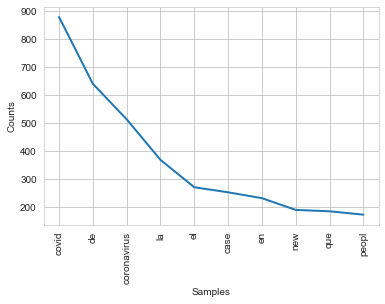

In [122]:
all_fdist.plot(10)

In [126]:
print("all", all_fdist.most_common(10))
print("climate",climate_fdist.most_common(10))
print("blm", blm_fdist.most_common(10))
print("covid", covid_fdist.most_common(10))

all [('covid', 880), ('de', 641), ('coronavirus', 514), ('la', 369), ('el', 271), ('case', 253), ('en', 232), ('new', 190), ('que', 185), ('peopl', 173)]
climate [('climat', 45), ('chang', 25), ('normal', 23), ('crisi', 14), ('go', 13), ('natur', 13), ('back', 12), ('alreadi', 12), ('inequ', 12), ('destruct', 11)]
blm [('black', 91), ('live', 77), ('matter', 76), ('georg', 60), ('floyd', 60), ('christian', 56), ('blacklivesmatt', 43), ('protest', 40), ('blm', 37), ('america', 32)]
covid [('covid', 877), ('de', 633), ('coronavirus', 513), ('la', 365), ('el', 270), ('case', 248), ('en', 226), ('que', 185), ('new', 178), ('peopl', 153)]


# export wordcounts as .csv

In [131]:
file = csv.writer(open('word_frequencies_all.csv', 'w'))
for key, count in all_fdist.most_common():
    file.writerow([key, count])

In [132]:
file = csv.writer(open('word_frequencies_climate.csv', 'w'))
for key, count in climate_fdist.most_common():
    file.writerow([key, count])

In [133]:
file = csv.writer(open('word_frequencies_blm.csv', 'w'))
for key, count in blm_fdist.most_common():
    file.writerow([key, count])

In [134]:
file = csv.writer(open('word_frequencies_covid.csv', 'w'))
for key, count in covid_fdist.most_common():
    file.writerow([key, count])